In [89]:
import numpy as np
import requests
import re
import pprint
%pip install matplotlib
import matplotlib
import pandas as pd

You should consider upgrading via the '/Users/bryankristiono/personal/adventOfCode2021/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
with open("../.cookie.txt") as f:
    line = f.read().split(":")
    headers = {line[0]: line[1].strip()}
    resp = requests.get("https://adventofcode.com/2021/leaderboard/private/view/452702.json", headers=headers)

In [97]:
pprint.pprint(resp.json()["members"])

{'1675338': {'completion_day_level': {'1': {'1': {'get_star_ts': 1638393000},
                                            '2': {'get_star_ts': 1638393418}},
                                      '2': {'1': {'get_star_ts': 1638456957},
                                            '2': {'get_star_ts': 1638457071}},
                                      '3': {'1': {'get_star_ts': 1638541621},
                                            '2': {'get_star_ts': 1638542940}},
                                      '4': {'1': {'get_star_ts': 1638631306},
                                            '2': {'get_star_ts': 1638631362}},
                                      '5': {'1': {'get_star_ts': 1638713854},
                                            '2': {'get_star_ts': 1638714108}},
                                      '6': {'1': {'get_star_ts': 1638767707},
                                            '2': {'get_star_ts': 1638767759}},
                                      '7': {'1': {'get_sta

In [157]:
members = resp.json()["members"]
from collections import OrderedDict

time_df = pd.DataFrame([])
for id, value in members.items():
    name = value["name"]
    stars = value["stars"]
    df = pd.json_normalize(value["completion_day_level"])
    df.index = [name]
    time_df = pd.concat([time_df, df], axis=0)
time_df = time_df.reindex(sorted(time_df.columns), axis=1).T
time_df.index = [i for i in range(1,len(time_df.index)+1)]
time_df = time_df.applymap(lambda x: pd.Timestamp(x, unit="s", tz="EST"), na_action="ignore")
display(time_df)

,yifanl1,Kristinus,Mark Oosterveld,NaN
1,2021-12-01 16:10:00-05:00,2021-12-01 16:26:06-05:00,2021-12-01 16:08:44-05:00,2021-12-01 16:14:12-05:00
2,2021-12-01 16:16:58-05:00,2021-12-01 16:43:11-05:00,2021-12-01 16:20:14-05:00,2021-12-01 16:17:01-05:00
3,2021-12-02 09:55:57-05:00,2021-12-02 10:28:21-05:00,NaT,2021-12-02 09:51:43-05:00
4,2021-12-02 09:57:51-05:00,2021-12-02 10:30:46-05:00,NaT,2021-12-02 10:08:12-05:00
5,2021-12-03 09:27:01-05:00,2021-12-03 16:49:43-05:00,NaT,2021-12-03 10:03:46-05:00
6,2021-12-03 09:49:00-05:00,2021-12-03 17:11:59-05:00,NaT,2021-12-03 10:42:26-05:00
7,2021-12-04 10:21:46-05:00,2021-12-04 03:13:46-05:00,NaT,2021-12-04 01:46:24-05:00
8,2021-12-04 10:22:42-05:00,2021-12-04 03:37:47-05:00,NaT,2021-12-04 02:01:51-05:00
9,2021-12-05 09:17:34-05:00,2021-12-05 00:58:31-05:00,NaT,2021-12-05 01:04:16-05:00
10,2021-12-05 09:21:48-05:00,2021-12-05 01:25:45-05:00,NaT,2021-12-05 01:17:08-05:00


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

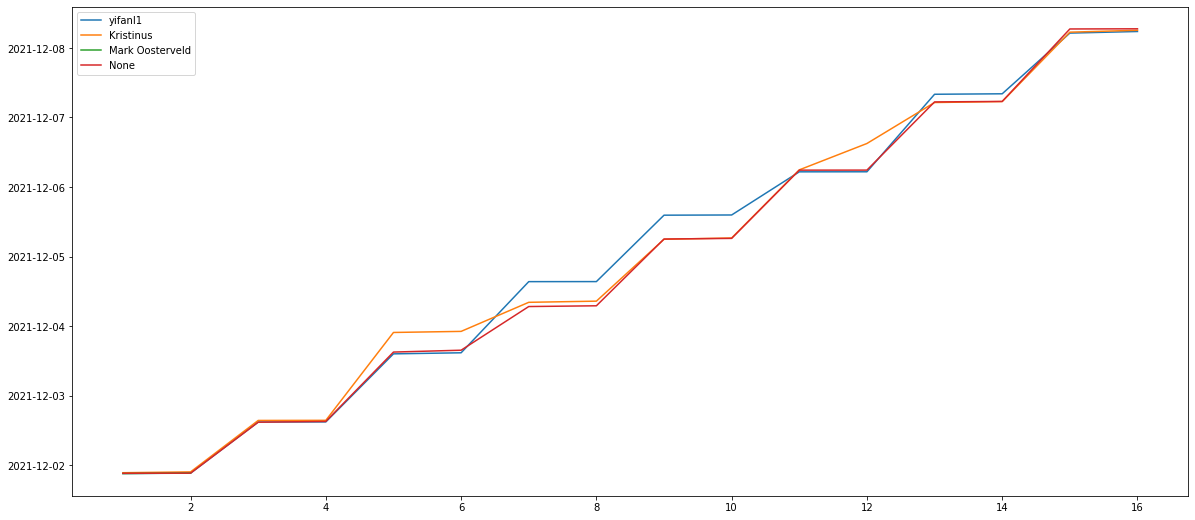

In [220]:
import matplotlib.pyplot as plt
plt.figure()
time_df.plot(figsize=(20,9))

In [214]:
from dateutil.relativedelta import relativedelta
import math
def relative(x):
    return x - pd.Series([pd.Timestamp(year=2021, month=12, day=math.ceil(i/2), tz="EST") for i in x.index], index=x.index)
rel_time_df = time_df.apply(relative)
rel_time_df

,yifanl1,Kristinus,Mark Oosterveld,NaN
1,0 days 16:10:00,0 days 16:26:06,0 days 16:08:44,0 days 16:14:12
2,0 days 16:16:58,0 days 16:43:11,0 days 16:20:14,0 days 16:17:01
3,0 days 09:55:57,0 days 10:28:21,NaT,0 days 09:51:43
4,0 days 09:57:51,0 days 10:30:46,NaT,0 days 10:08:12
5,0 days 09:27:01,0 days 16:49:43,NaT,0 days 10:03:46
6,0 days 09:49:00,0 days 17:11:59,NaT,0 days 10:42:26
7,0 days 10:21:46,0 days 03:13:46,NaT,0 days 01:46:24
8,0 days 10:22:42,0 days 03:37:47,NaT,0 days 02:01:51
9,0 days 09:17:34,0 days 00:58:31,NaT,0 days 01:04:16
10,0 days 09:21:48,0 days 01:25:45,NaT,0 days 01:17:08


<AxesSubplot:>

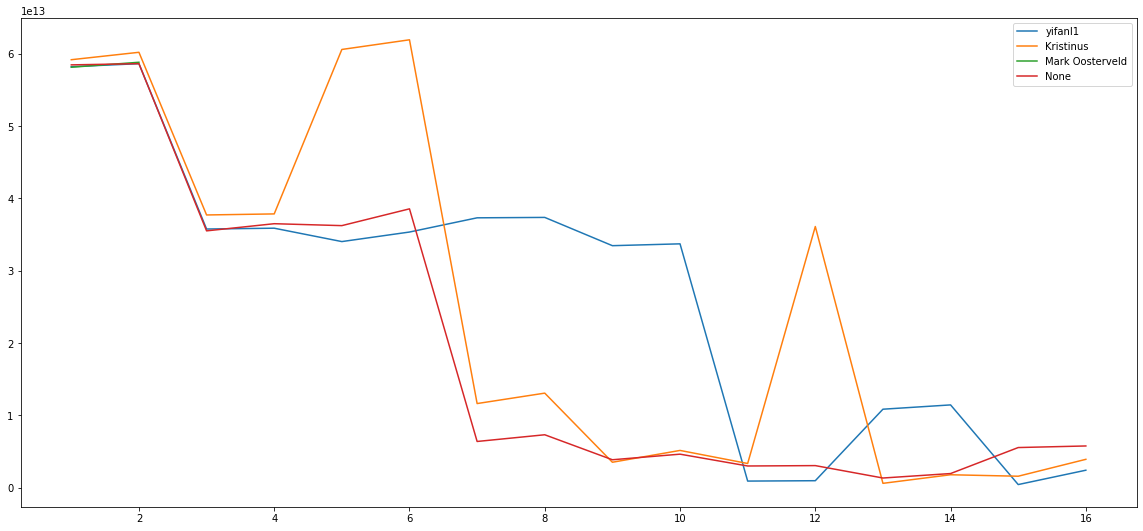

In [219]:
rel_time_df.plot(figsize=(20,9))